In [1]:
import glob
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random as rn
from skimage.feature import hog

In [2]:
veh_img_arr=glob.glob('./vehicles/*/*.png')

veh_img_orig=[]
for imgPath in veh_img_arr:
    img=cv2.imread(imgPath)
    rgbImg=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    veh_img_orig.append(rgbImg)

print('Reading of Vehicle Images Done')
print('No. of Vehicle Images loaded='+str(len(veh_img_arr)))

non_veh_orig=[]
non_veh_arr=glob.glob('./non-vehicles/*/*.png')
for imgPath in non_veh_arr:
    img=cv2.imread(imgPath)
    rgbImg=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    non_veh_orig.append(rgbImg)



print('Reading of Non-Vehicle Images Done')
print('No. of Non-Vehicle Images loaded='+str(len(non_veh_arr)))

Reading of Vehicle Images Done
No. of Vehicle Images loaded=8792
Reading of Non-Vehicle Images Done
No. of Non-Vehicle Images loaded=8968


Shape of Vehicle image=(64L, 64L, 3L)
Shape of Non-Vehicle image=(64L, 64L, 3L)


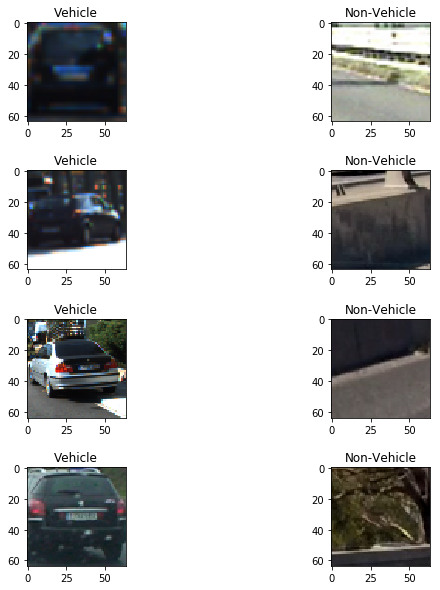

In [3]:
f,axes = plt.subplots(4,2,figsize=(10,10))
plt.subplots_adjust(hspace=0.5)

for index in range(4):
    veh=rn.randint(0,len(veh_img_orig)-1)
    non_veh=rn.randint(0,len(non_veh_arr)-1)
    axes[index,0].imshow(veh_img_orig[veh])
    axes[index,0].set_title('Vehicle')
    axes[index,1].imshow(non_veh_orig[non_veh])
    axes[index,1].set_title('Non-Vehicle')

print('Shape of Vehicle image='+str(veh_img_orig[veh].shape))
print('Shape of Non-Vehicle image='+str(non_veh_orig[non_veh].shape))

In [4]:
def ExtractColorHistogram(image,nbins=32,bins_range=(0,255),resize=None):
    if(resize!=None):
        image=cv2.resize(image,resize)
    r_channel=np.histogram(image[:,:,0],bins=nbins,range=bins_range)
    g_channel=np.histogram(image[:,:,1],bins=nbins,range=bins_range)
    b_channel=np.histogram(image[:,:,2],bins=nbins,range=bins_range)
    return r_channel,g_channel,b_channel

def FindBinCenter(histogram_channel):
    bin_edges=histogram_channel[1]
    bin_centers=(bin_edges[1:]+bin_edges[0:len(bin_edges)-1])/2
    return bin_centers

def ExtractColorFeatures(r_channel,g_channel,b_channel):
    return np.concatenate((r_channel[0],g_channel[0],b_channel[0]))                              

No. of Features=384


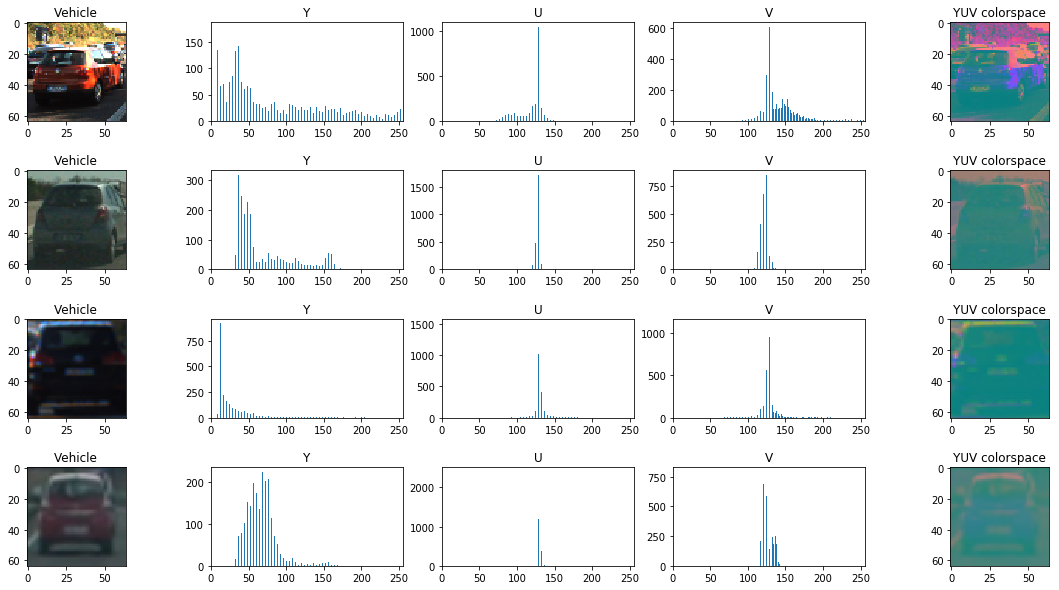

In [5]:
f,axes=plt.subplots(4,5,figsize=(20,10))
f.subplots_adjust(hspace=0.5)

for i in range(4):
    veh=rn.randint(0,len(veh_img_orig)-1)
    coloredImg=cv2.cvtColor(veh_img_orig[veh],cv2.COLOR_RGB2YUV)
    r,g,b = ExtractColorHistogram(coloredImg,128)
    center=FindBinCenter(r)
    
    axes[i,0].imshow(veh_img_orig[veh])
    axes[i,0].set_title('Vehicle')
    axes[i,1].set_xlim(0,256)
    axes[i,1].bar(center,r[0])
    axes[i,1].set_title('Y')
    axes[i,2].set_xlim(0,256)
    axes[i,2].bar(center,g[0])
    axes[i,2].set_title('U')
    axes[i,3].set_xlim(0,256)
    axes[i,3].bar(center,b[0])
    axes[i,3].set_title('V')
    axes[i,4].imshow(coloredImg)
    axes[i,4].set_title("YUV colorspace")
    
features=ExtractColorFeatures(r,g,b)
print('No. of Features='+str(len(features)))

No. of Features=384


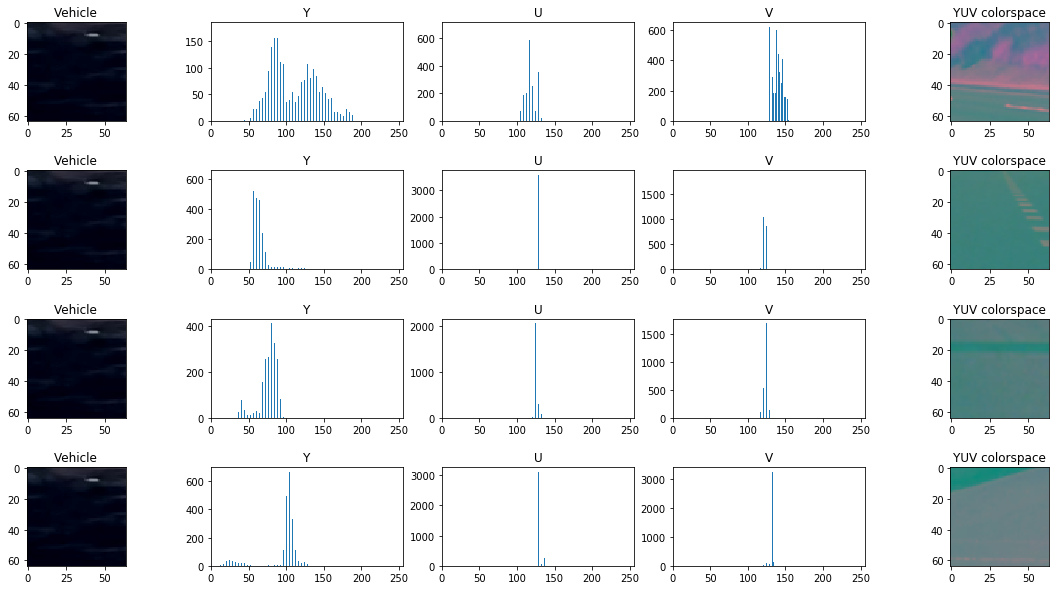

In [6]:
f,axes=plt.subplots(4,5,figsize=(20,10))
f.subplots_adjust(hspace=0.5)

for i in range(4):
    non_veh=rn.randint(0,len(non_veh_orig)-1)
    coloredImg=cv2.cvtColor(non_veh_orig[non_veh],cv2.COLOR_RGB2YUV)
    r,g,b = ExtractColorHistogram(coloredImg,128)
    center=FindBinCenter(r)
    
    axes[i,0].imshow(non_veh_orig[veh])
    axes[i,0].set_title('Vehicle')
    axes[i,1].set_xlim(0,256)
    axes[i,1].bar(center,r[0])
    axes[i,1].set_title('Y')
    axes[i,2].set_xlim(0,256)
    axes[i,2].bar(center,g[0])
    axes[i,2].set_title('U')
    axes[i,3].set_xlim(0,256)
    axes[i,3].bar(center,b[0])
    axes[i,3].set_title('V')
    axes[i,4].imshow(coloredImg)
    axes[i,4].set_title("YUV colorspace")
    
features=ExtractColorFeatures(r,g,b)
print('No. of Features='+str(len(features)))

In [7]:
def SpatialBinningFeatures(img,size):
    img=cv2.resize(img,size)
    return img.ravel()

In [8]:
featureList=SpatialBinningFeatures(veh_img_orig[1],(16,16))
print('No. of Features before Spatial Binning='+str(len(veh_img_orig[1].ravel())))
print('No. of Features after Spatial Binning='+str(len(featureList)))

No. of Features before Spatial Binning=12288
No. of Features after Spatial Binning=768


In [10]:
def GetFeaturesFromHog(image,orient,cellsPerBlock,pixelsPerCell, visualise= False, feature_vector_flag=True):
    if(visualise==True):
        hog_features, hog_image = hog(image, orientations=orient,
                          pixels_per_cell=(pixelsPerCell, pixelsPerCell), 
                          cells_per_block=(cellsPerBlock, cellsPerBlock), 
                          visualise=True, feature_vector=feature_vector_flag)
        return hog_features, hog_image
    else:
        hog_features = hog(image, orientations=orient,
                          pixels_per_cell=(pixelsPerCell, pixelsPerCell), 
                          cells_per_block=(cellsPerBlock, cellsPerBlock), 
                          visualise=False, feature_vector=feature_vector_flag)
        return hog_features

('Feature Vector Length returned =', 324)
('No of features that can be extracted =', 4096)


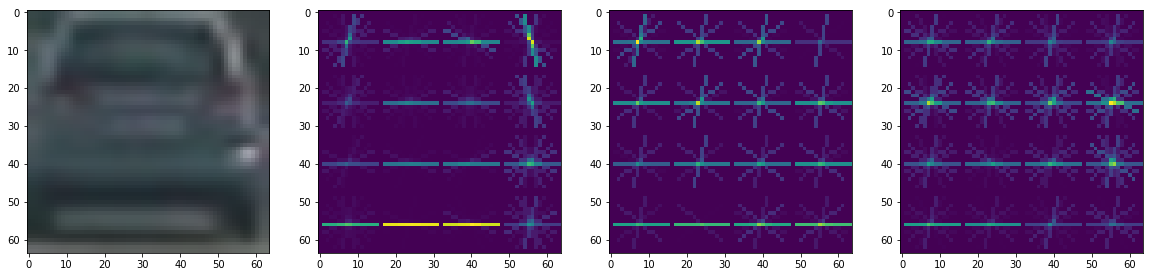

In [14]:
img=veh_img_orig[10]
yuv_img=cv2.cvtColor(img, cv2.COLOR_RGB2YUV)

img_channel_0=yuv_img[:,:,0]
img_channel_1=yuv_img[:,:,1]
img_channel_2=yuv_img[:,:,2]

feature_0, hog_img_0=GetFeaturesFromHog(img_channel_0,9,2,16,visualise=True,feature_vector_flag=True)
feature_1, hog_img_1=GetFeaturesFromHog(img_channel_1,9,2,16,visualise=True,feature_vector_flag=True)
feature_2, hog_img_2=GetFeaturesFromHog(img_channel_2,9,2,16,visualise=True,feature_vector_flag=True)

f, axes=plt.subplots(1,4,figsize=(20,10))
axes[0].imshow(img)
axes[1].imshow(hog_img_0)
axes[2].imshow(hog_img_1)
axes[3].imshow(hog_img_2)

print("Feature Vector Length returned =",len(feature_0))
print('No of features that can be extracted =',len(hog_img_0.ravel()))

In [15]:
def ConvertImgColorSpace(img, colorspace):
    return cv2.cvtColor(img, colorspace)

In [16]:
def ExtractFeatures(images,orientation,cellsPerBlock,pixelsPerCell,convertColorspace=False):
    featureList=[]
    imageList=[]
    for image in images:
        if(convertColorspace==True):
            image=cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
        local_features0=GetFeaturesFromHog(image[:,:,0],orientation,cellsPerBlock,pixelsPerCell,False,True)
        local_features1=GetFeaturesFromHog(image[:,:,1],orientation,cellsPerBlock,pixelsPerCell,False,True)
        local_features2=GetFeaturesFromHog(image[:,:,2],orientation,cellsPerBlock,pixelsPerCell,False,True)
        x=np.hstack((local_features0,local_features1,local_features2))
        featureList.append(x)
    return featureList

In [18]:
%%time

orientations=9
cellsPerBlock=2
pixelsPerCell=16
convertColorspace=True
vehicleFeatures=ExtractFeatures(veh_img_orig,orientations,cellsPerBlock,pixelsPerCell,convertColorspace)
nonVehicleFeatures=ExtractFeatures(non_veh_orig,orientations,cellsPerBlock,pixelsPerCell,convertColorspace)

Wall time: 1min 29s


In [19]:
featuresList=np.vstack([vehicleFeatures,nonVehicleFeatures])
print("Shape of features list is ", featuresList.shape)
labelList= np.concatenate([np.ones(len(vehicleFeatures)), np.zeros(len(nonVehicleFeatures))])
print("Shape of label list is ", labelList.shape)

('Shape of features list is ', (17760L, 972L))
('Shape of label list is ', (17760L,))


In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(featuresList, labelList, test_size=0.2, shuffle=True)

In [21]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaler.fit(X_train)
X_train_scaled= scaler.transform(X_train)
X_test_scaled= scaler.transform(X_test)

In [22]:
%%time
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
classifier2=AdaBoostClassifier(base_estimator=RandomForestClassifier(), n_estimators = 50, learning_rate = 1)
classifier2.fit(X_train, Y_train)
print("Accuracy of Adaboost is ", classifier2.score(X_test,Y_test))

C:\Users\User\Anaconda2\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


('Accuracy of Adaboost is ', 0.9943693693693694)
Wall time: 5min 30s


In [25]:
import os
import math

def extractFrames(pathIn, pathOut):
    os.mkdir(pathOut)
 
    cap = cv2.VideoCapture(pathIn)
    frameRate = cap.get(5)
    count = 0
 
    while (cap.isOpened()):
        frameId = cap.get(1)
        
        # Capture frame-by-frame
        ret, frame = cap.read()
 
        if ret != True:
            break
        if (frameId % (5*math.floor(frameRate)) == 0):
            print('Read %d frame: ' % count, ret)
            cv2.imwrite(os.path.join(pathOut, "frame{:d}.jpg".format(count)), frame)  # save frame as JPEG file
            count += 1
                
 
    cap.release()
    cv2.destroyAllWindows()
    

extractFrames('college.AVI', 'data')

('Read 0 frame: ', True)
('Read 1 frame: ', True)
('Read 2 frame: ', True)
('Read 3 frame: ', True)
('Read 4 frame: ', True)
('Read 5 frame: ', True)
('Read 6 frame: ', True)
('Read 7 frame: ', True)


In [26]:
import matplotlib.image as mpimg

def draw_boxes(img, bboxes, color=(0, 0, 255), thick=6):
    imcopy = np.copy(img)
    
    for bbox in bboxes:
        r=rn.randint(0,255)
        g=rn.randint(0,255)
        b=rn.randint(0,255)
        color=(r,g,b)
        cv2.rectangle(imcopy,bbox[0],bbox[1],color,thick)
    return imcopy

In [27]:
def slide_window(img, x_start_stop=[None, None], y_start_stop=[None, None], 
                    xy_window=(64, 64), xy_overlap=(0.9, 0.9)):
    if x_start_stop[0] == None:
        x_start_stop[0]=0
    if x_start_stop[1] == None:
        x_start_stop[1]=img.shape[1]
    if y_start_stop[0] ==  None:
        y_start_stop[0]= 0
    if y_start_stop[1] ==  None:
        y_start_stop[1]=img.shape[0]
    
    window_list = []
    image_width_x= x_start_stop[1] - x_start_stop[0]
    image_width_y= y_start_stop[1] - y_start_stop[0]
    
    windows_x = np.int( 1 + (image_width_x - xy_window[0])/(xy_window[0] * xy_overlap[0]))
    windows_y = np.int( 1 + (image_width_y - xy_window[1])/(xy_window[1] * xy_overlap[1]))

    modified_window_size= xy_window
    for i in range(0,windows_y):
        y_start = y_start_stop[0] + np.int( i * modified_window_size[1] * xy_overlap[1])
        for j in range(0,windows_x):
            x_start = x_start_stop[0] + np.int( j * modified_window_size[0] * xy_overlap[0])
            
            x1 = np.int( x_start +  modified_window_size[0])
            y1= np.int( y_start + modified_window_size[1])
            window_list.append(((x_start,y_start),(x1,y1)))
    return window_list

In [28]:
def drawCars(image, windows, converColorspace=False):
    refinedWindows=[]
    for window in windows:
        start=window[0]
        end=window[1]
        clippedImage=image[start[1]:end[1], start[0]:end[0]]
        if(clippedImage.shape[1]==clippedImage.shape[0] and clippedImage.shape[1]!=0):
            clippedImage=cv2.resize(clippedImage, (64,64))
            f1=ExtractFeatures([clippedImage], 9 , 2 , 16,converColorspace)
            predictedOutput=classifier2.predict([f1[0]])
            if(predictedOutput==1):
                refinedWindows.append(window)    
    return refinedWindows        

('Total No of windows are ', 92)
0
0
92
0


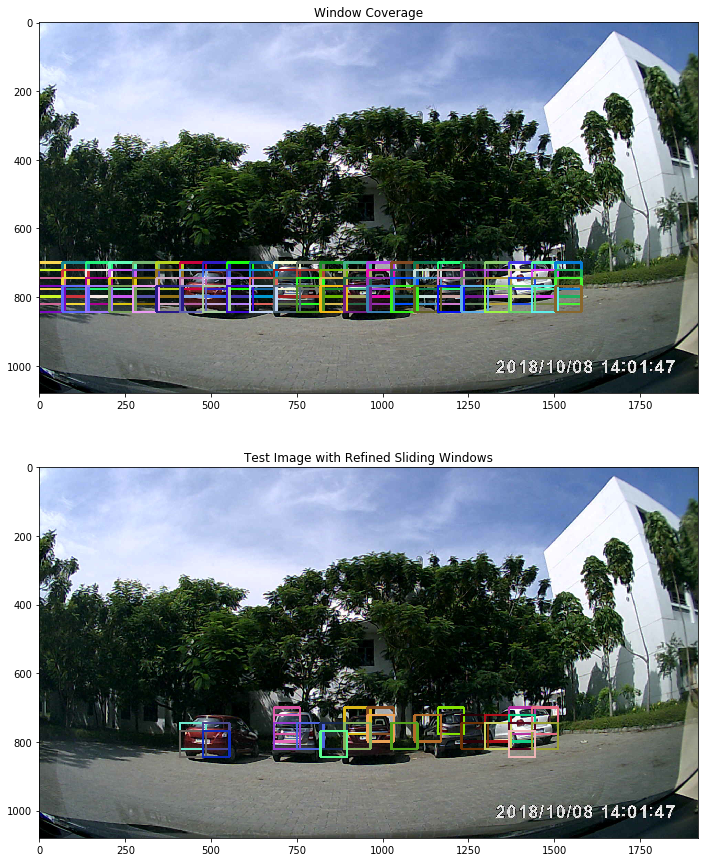

In [29]:
image = mpimg.imread('frame6.JPG')

windows1 = slide_window(image, x_start_stop=[0,1600], y_start_stop=[650,700], 
                    xy_window=(96,96), xy_overlap=(0.6, 0.6))
windows4 = slide_window(image, x_start_stop=[0,1600 ], y_start_stop=[600,700], 
                    xy_window=(128,128), xy_overlap=(0.5, 0.4))
windows2 = slide_window(image, x_start_stop=[0, 1600], y_start_stop=[750,800], 
                    xy_window=(96,96), xy_overlap=(0.6, 0.6))
windows3 = slide_window(image, x_start_stop=[0, 1600], y_start_stop=[700,850], 
                    xy_window=(76,76), xy_overlap=(0.9, 0.3))

windows = windows1 + windows2 +  windows3 + windows4
print("Total No of windows are ",len(windows))

print(len(windows1))
print(len(windows2)) 
print(len(windows3))
print(len(windows4))

refinedWindows=drawCars(image,windows, True)

f,axes= plt.subplots(2,1, figsize=(30,15))

window_img = draw_boxes(image, windows) 

axes[0].imshow(window_img)
axes[0].set_title("Window Coverage")

window_img = draw_boxes(image, refinedWindows) 

axes[1].set_title("Test Image with Refined Sliding Windows")
axes[1].imshow(window_img)

In [46]:
def add_heat(heatmap, bbox_list):
    for box in bbox_list:
        heatmap[box[0][1]:box[1][1], box[0][0]:box[1][0]] += 1
    return heatmap 

In [38]:
def apply_threshold(heatmap, threshold):
    heatmap[heatmap <= threshold] = 0
    return heatmap

In [39]:
from scipy.ndimage.measurements import label
def draw_labeled_bboxes(img, labels):
    for car_number in range(1, labels[1]+1):
        nonzero = (labels[0] == car_number).nonzero()
        nonzeroy = np.array(nonzero[0])
        nonzerox = np.array(nonzero[1])
        bbox = ((np.min(nonzerox), np.min(nonzeroy)), (np.max(nonzerox), np.max(nonzeroy)))
        cv2.rectangle(img, bbox[0], bbox[1], (0,0,255), 6)
    return img

(' Number of Cars found - ', 3)


Text(0.5,1,'Final Image after applying Heat Map')

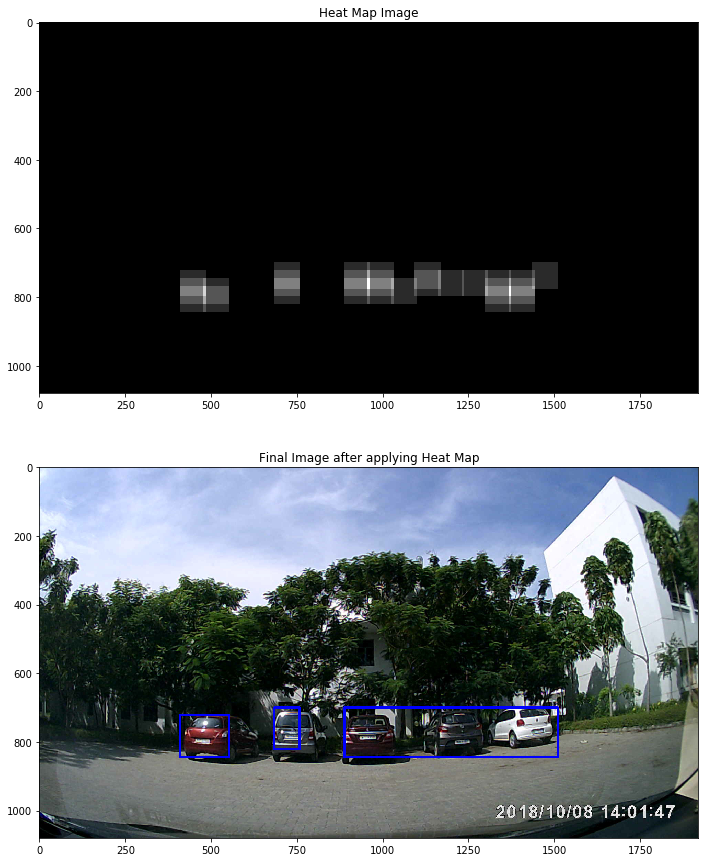

In [164]:
heat = np.zeros_like(image[:,:,0]).astype(np.float)

heat = add_heat(heat,refinedWindows)
    
heat = apply_threshold(heat,0)

heatmap = np.clip(heat, 0, 255)

heat_image=heatmap

labels = label(heatmap)
print(" Number of Cars found - ",labels[1])
draw_img = draw_labeled_bboxes(np.copy(image), labels)

f,axes= plt.subplots(2,1, figsize=(30,15))
axes[0].imshow(heat_image,cmap='gray')
axes[0].set_title("Heat Map Image")
axes[1].imshow(draw_img)
axes[1].set_title("Final Image after applying Heat Map")

In [158]:
class KeepTrack():
    def __init__(self):
        self.refinedWindows = [] 
        
    def AddWindows(self, refinedWindow):
        self.refinedWindows.append(refinedWindow)
        frameHistory=15
        if len(self.refinedWindows) > frameHistory:
            self.refinedWindows = self.refinedWindows[len(self.refinedWindows)-frameHistory:]

In [159]:
orientation=9 # No of orientations of HOG
cellsPerBlock=2 # No of cells per block
pixelsPerCell=16 # No of pixels per cell
xy_window=(96, 96) # window Size
xy_overlap=(0.6, 0.6) # Window Overlap. Please note this is different as provided by Udacity. Overlap of 0.15 means my windows are 85% overlapping with each other
x_start_stop=[0, 1600] # X Coordinates to start and stop search
y_start_stop=[650, 700] # Y Coordinates to start and stop search

# Window 1- Size - 64x64 , Overlap-85%
windows_normal = slide_window(image, x_start_stop, [650,700], 
                    xy_window, xy_overlap)

# Window 2- Size - 80x80 , Overlap-80%
xy_window_1_25= (96,96)
xy_window_1_25_overlap=(0.6, 0.6)    
windows_1_25 = slide_window(image, x_start_stop, [750,800], 
                    xy_window_1_25, xy_window_1_25_overlap)

# Window 3- Size - 96x96 , Overlap-70%
xy_window_1_5= (76,76)
xy_window_1_5_overlap=(0.9, 0.3)    
windows_1_5 = slide_window(image, x_start_stop, [700,850], 
                    xy_window_1_5, xy_window_1_5_overlap)

# Window 4- Size - 128x128 , Overlap-50%
xy_window_twice_overlap=(0.5, 0.4)    
xy_window_twice = (128,128)
windows_twice = slide_window(image, x_start_stop, [600,700], 
                    xy_window_twice, xy_window_twice_overlap)

# Total Windows - 470
windows= windows_normal +  windows_1_5  + windows_twice +windows_1_25
print("No of Windows are ",len(windows))

('No of Windows are ', 92)


In [160]:
def Pipeline(image):
#     features,hog_image=GetFeaturesFromHog(image[:,:,0],orientation,cellsPerBlock,pixelsPerCell, visualise= True, feature_vector_flag=False)
#     features1,hog_image1=GetFeaturesFromHog(image[:,:,1],orientation,cellsPerBlock,pixelsPerCell, visualise= True, feature_vector_flag=False)
#     features2,hog_image2=GetFeaturesFromHog(image[:,:,2],orientation,cellsPerBlock,pixelsPerCell, visualise= True, feature_vector_flag=False)
#     refinedWindows=DrawCarsOptimised(hog_image,hog_image1,hog_image2,windows, True)
    
#     image=find_cars(image, 400, 528, 1,  orientation, pixelsPerCell, cellsPerBlock)
#     image=find_cars(image, 400, 560, 1.25,  orientation, pixelsPerCell, cellsPerBlock)
#     image=find_cars(image, 400, 588, 1.5,  orientation, pixelsPerCell, cellsPerBlock)
#     image=find_cars(image, 400, 660, 2,  orientation, pixelsPerCell, cellsPerBlock)
    rand= rn.randint(0,1)
    if(rand<0.4):
        refinedWindows=keepTrack.refinedWindows[:-1]
    else:
        refinedWindows=drawCars(image,windows, True)
        if len(refinedWindows) > 0:
            keepTrack.AddWindows(refinedWindows)
    
    #refinedWindows=DrawCars(image,windows, True)
#     if len(refinedWindows) > 0:
#         keepTrack.AddWindows(refinedWindows)
            
    heat = np.zeros_like(image[:,:,0]).astype(np.float)
    
    for refinedWindow in keepTrack.refinedWindows:
        heat = add_heat(heat, refinedWindow)
    
    
    
    heatmap = apply_threshold(heat, 25 + len(keepTrack.refinedWindows)//2)
    
    labels = label(heatmap)
    draw_img = draw_labeled_bboxes(np.copy(image), labels)
    return draw_img

In [161]:
def PipelineImage(image):

    refinedWindows=drawCars(image,windows, True)
    heat = np.zeros_like(image[:,:,0]).astype(np.float)
    heat = add_heat(heat,refinedWindows)
   
    heatmap = np.clip(heat, 0, 255)
    heatmap = apply_threshold(heat, 0)
    labels = label(heatmap)
    draw_img = draw_labeled_bboxes(np.copy(image), labels)
    return draw_img,heatmap,labels

In [162]:
%%time
import os
test_images= glob.glob("./data/*.jpg")
i=1
os.mkdir('Final')
for index,image in enumerate(test_images):
    image = cv2.imread(image)
    finalPic,heatmap, labels = PipelineImage(image)
    cv2.imwrite('./Final/%d.jpg'%i,finalPic)
    i=i+1
    print(labels[1])

3
4
5
4
4
5
2
2
Wall time: 32.6 s
